In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import pickle
from sklearn.tree import DecisionTreeRegressor

## Get the data

In[20]:

In [2]:
data = pd.read_csv("Potato_cleaned_data.csv")
data.head(5)

,Unnamed: 0,index,Commodity,Date,Unit,Minimum,Maximum,Price,Day,Month,Year
0,0,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5,16,6,2013
1,1,77,Potato White,2013-06-17,Kg,15.0,16.0,15.5,17,6,2013
2,2,150,Potato White,2013-06-18,Kg,15.0,16.0,15.5,18,6,2013
3,3,223,Potato White,2013-06-19,Kg,15.0,16.0,15.5,19,6,2013
4,4,296,Potato White,2013-06-20,Kg,15.0,16.0,15.5,20,6,2013


## Node class

In[21]:

## Tree class

In[22]:

## Train-Test split

In[23]:

In [3]:
X = data[["Day","Month","Year"]].values
Y = data["Price"].values.reshape(-1,1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,shuffle=True, random_state=1)

In [5]:
x_train.shape
x_test.shape

(477, 3)

## Fit the model

In[24]:

In [6]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=3)

## Test the model

In[25]:

In [7]:
y_predict = regressor.predict(x_test) 

In [8]:
from sklearn.preprocessing import StandardScaler
np.sqrt(mean_squared_error(y_test, y_predict))

6.216236345599761

In[26]:

In [9]:
dframe = pd.DataFrame(y_test,y_predict).reset_index()

In[27]:

In [10]:
scaler = StandardScaler()

In[28]:

In [11]:
scaler.fit(x_train)

StandardScaler()

In[29]:

In [12]:
dframe.columns = ['Actual Price', 'Predicted Price']
dfr=dframe
dfr

,Actual Price,Predicted Price
0,22.904762,23.5
1,29.789894,37.5
2,29.789894,39.5
3,29.789894,26.5
4,29.789894,39.0
...,...,...
472,29.789894,32.5
473,39.893617,41.0
474,23.038095,31.5
475,29.789894,29.0


In[30]:

print("Mean squared error is:", mean_squared_error(y_test,y_predict))<br>
print("Absolute Error is:", mean_absolute_error(y_test,y_predict))

In[31]:

<AxesSubplot:>

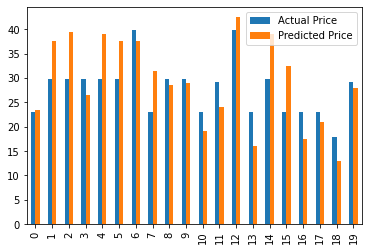

In [13]:
import matplotlib.pyplot as plt
graph = dfr.head(20)
graph.plot(kind='bar')

In[33]:

In [14]:
pickle.dump(regressor, open('model.pkl', 'wb'))

In[34]:

In [15]:
for data in regressor.predict([[2,3,2022]]):
    price = data
print("Predicted price of potato white is Rs ",data)

Predicted price of potato white is Rs  22.904761904761905
